In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

from itertools import product
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB # Import Naive Bayes Classifier
from sklearn.svm import SVC, LinearSVC # Import SVM Classifier
from sklearn.neighbors import KNeighborsClassifier # Import KNN Classifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from pprint import pprint
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from prettytable import PrettyTable
from scipy import stats
from matplotlib.pyplot import pie, axis, show
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif, SelectFromModel, RFE
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
# https://github.com/caiocarneloz/masksemi
from masksemi.masksemi import maskData
# https://www.kaggle.com/semisupervised/semi-supervised-sklearn

from helpers import Trainer, plot_conf_mat, plot_roc, plot_roc_avg, plot_pie_chart, stats_test

random.seed(0)

In [2]:
X_cs_15 = np.load('npy_data_2/X_combinedSampling_15Features_task1.npy')
y_cs_15 = np.load('npy_data_2/y_combinedSampling_15Features_task1.npy')
print('X_cs_15.shape, y_cs_15.shape', X_cs_15.shape, y_cs_15.shape)

classes = ['No', '>30', '<30']

X_cs_15.shape, y_cs_15.shape (74652, 15) (74652,)


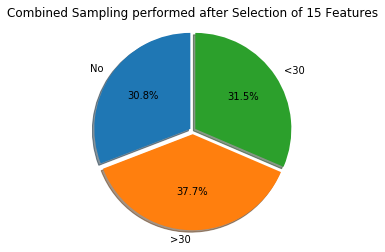

In [3]:
plot_pie_chart(classes, y_cs_15, 15)

In [4]:
kfold = StratifiedKFold(10, random_state=False, shuffle=True)

folds_15 = kfold.split(X_cs_15, y_cs_15)
folds_15 = [(train, test) for train, test in folds_15]

In [5]:
data_classes_15  = []

for i in range(3):
    data_classes_15.append(len(y_cs_15[y_cs_15==i]))
    
cls2clr = {
    0: 'red',
    1: 'green',
    2: 'blue'
}
clf2clr = {
    0: 'red',
    1: 'green',
    2: 'blue',
    3: 'purple',
    4: 'cornflowerblue',
}

In [6]:
trainer = Trainer(X=X_cs_15, y=y_cs_15, folds=folds_15, data_classes=data_classes_15, classes=classes)

----------------15 Selected Features----------------
+---------------+-----------------------+
|     XTrees    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   3.8172000000000006  |
|    Accuracy   |   0.9508385305189734  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.9308325865000722 | 0.951930425418858  | 0.9700356978842273 |
|     Recall     |  0.95865919985755  | 0.9374979454415312 | 0.9591584153030432 |
|  Specificity   | 0.9682125138163442 | 0.9713389371420187 | 0.9863985437136767 |
|    F1-score    | 0.9445317518371039 | 0.9446492255683523 | 0.9645570350634148 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+---------+
|

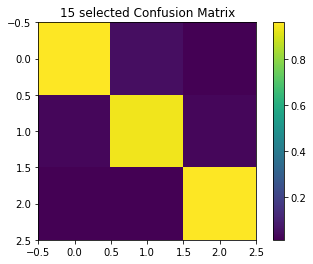

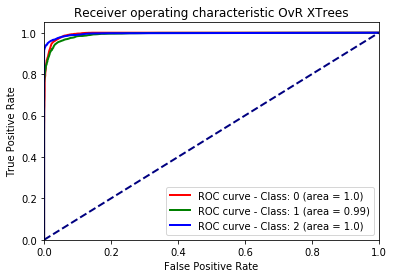

In [7]:
tables, xtrees_metrics_15 = trainer.train_model(model_name='XTrees')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(xtrees_metrics_15, data_classes_15, cls2clr, 'XTrees')

### Unlabel Data 

In [8]:
X_ssl_10, y_ssl_10 = X_cs_15, maskData(y_cs_15, 1. - 0.1)
X_ssl_20, y_ssl_20 = X_cs_15, maskData(y_cs_15, 1. - 0.2)
X_ssl_50, y_ssl_50 = X_cs_15, maskData(y_cs_15, 1. - 0.5)
X_ssl_90, y_ssl_90 = X_cs_15, maskData(y_cs_15, 1. - 0.9)
X_ssl_95, y_ssl_95 = X_cs_15, maskData(y_cs_15, 1. - 0.95)

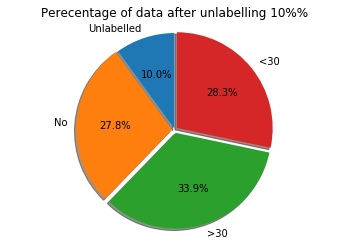

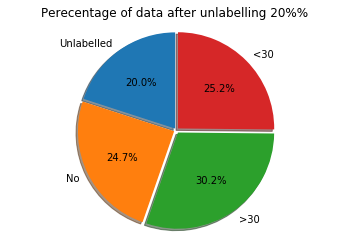

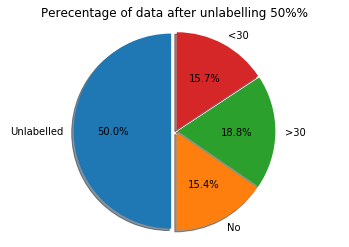

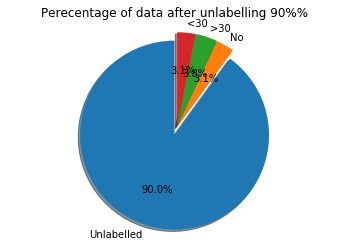

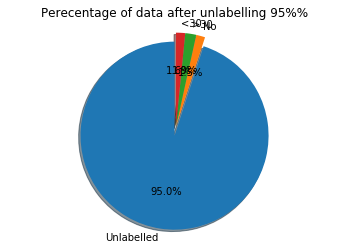

In [9]:
plot_pie_chart(['Unlabelled'] + classes, y_ssl_10, '10%', 'ssl')
plot_pie_chart(['Unlabelled'] + classes, y_ssl_20, '20%', 'ssl')
plot_pie_chart(['Unlabelled'] + classes, y_ssl_50, '50%', 'ssl')
plot_pie_chart(['Unlabelled'] + classes, y_ssl_90, '90%', 'ssl')
plot_pie_chart(['Unlabelled'] + classes, y_ssl_95, '95%', 'ssl')

/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:401: RuntimeWarning: divide by zero encountered in true_divide
  affinity_matrix.data /= np.diag(np.array(normalizer))
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:401: RuntimeWarning: divide by zero encountered in true_divide
  affinity_matrix.data /= np.diag(np.array(normalizer))
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:401: RuntimeWarning: divide by zero encountered in true_divide
  affinity_matrix.data /= np.diag(np.array(normalizer))
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:401: RuntimeWarning: divide by zero encou

----------------SSL LabelProp - 10% Unlabelled----------------
+---------------+-----------------------+
|   LabelProp   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   77.02340000000001   |
|    Accuracy   |   0.8168963224936301  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.7475917530800062 | 0.867271140764092  | 0.8867472766582027 |
|     Recall     | 0.8351122680989137 | 0.8006214171466949 | 0.8185315908832133 |
|  Specificity   | 0.8507441408532067 | 0.9246596423718699 | 0.9519258342667474 |
|    F1-score    | 0.7810855457414893 | 0.8272804500397068 | 0.8385324564277006 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+--

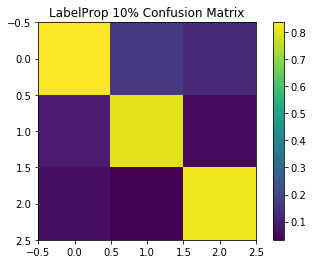

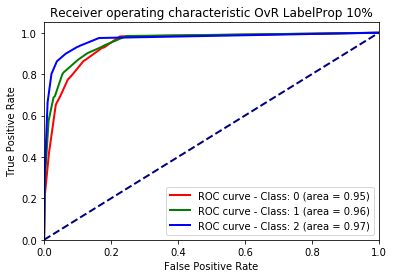

-----------------------------------------------------------------------


/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:401: RuntimeWarning: divide by zero encountered in true_divide
  affinity_matrix.data /= np.diag(np.array(normalizer))
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.labe

----------------SSL LabelProp - 20% Unlabelled----------------
+---------------+-----------------------+
|   LabelProp   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   78.35249999999999   |
|    Accuracy   |   0.795007606709694   |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.732905908768555  | 0.857077370841109  | 0.879175615074286  |
|     Recall     | 0.8307261370636947 | 0.7606437995255896 | 0.8011552090381713 |
|  Specificity   | 0.8218796411716515 | 0.9234340208709788 | 0.9502256422075905 |
|    F1-score    | 0.7663533162464593 | 0.7842185509708851 | 0.8150921671305195 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+--

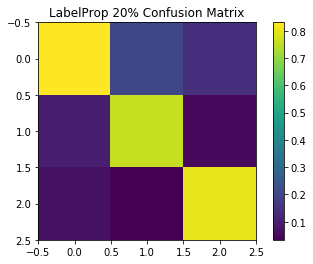

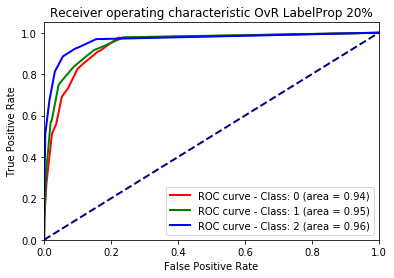

-----------------------------------------------------------------------


/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions

----------------SSL LabelProp - 50% Unlabelled----------------
+---------------+-----------------------+
|   LabelProp   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   81.65129999999999   |
|    Accuracy   |   0.7572723894649717  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.6653709149483412 | 0.8416416023169889 | 0.8813346277531549 |
|     Recall     | 0.8292057011724593 | 0.6951911086536363 | 0.7611222797333745 |
|  Specificity   | 0.7641728732810569 | 0.9267665635493685 | 0.9503625480291082 |
|    F1-score    | 0.7257614154855376 | 0.7294344426931353 | 0.7751931875172497 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+--

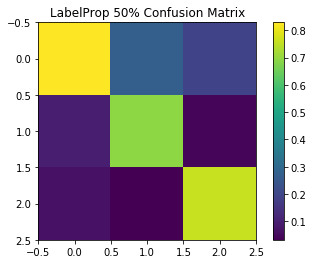

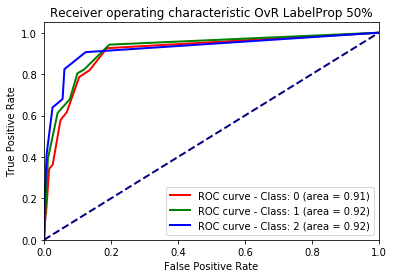

-----------------------------------------------------------------------


/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions

----------------SSL LabelProp - 90% Unlabelled----------------
+---------------+-----------------------+
|   LabelProp   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |        80.5291        |
|    Accuracy   |   0.5083449471944169  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+---------------------+
| Metric / Class |         No         |        >30         |         <30         |
+----------------+--------------------+--------------------+---------------------+
|   Percision    | 0.3863027710079031 | 0.8330191493926865 |  0.8400088845818658 |
|     Recall     | 0.9600915287090119 | 0.2761924329128274 | 0.34355204251618904 |
|  Specificity   | 0.3119064487629658 | 0.9869271493182168 |  0.9888023035490813 |
|    F1-score    | 0.5501344012748681 | 0.4126823053494214 | 0.48701026848604256 |
+----------------+--------------------+--------------------+---------------------+
+-----+---------+----

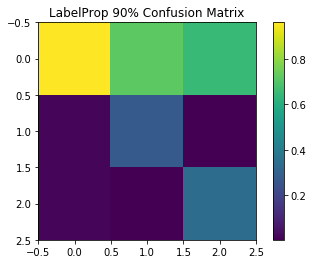

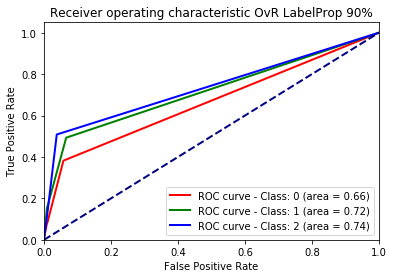

-----------------------------------------------------------------------


/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions

----------------SSL LabelProp - 95% Unlabelled----------------
+---------------+-----------------------+
|   LabelProp   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   80.98089999999999   |
|    Accuracy   |   0.424234562613744   |
+---------------+-----------------------+
+----------------+---------------------+---------------------+---------------------+
| Metric / Class |          No         |         >30         |         <30         |
+----------------+---------------------+---------------------+---------------------+
|   Percision    |  0.3482631509981082 |  0.8455753725455786 |  0.8529823976567388 |
|     Recall     |  0.9819783472847149 | 0.15200749614020737 |  0.2035269638825612 |
|  Specificity   | 0.17762897387102203 |  0.9942806795431324 |  0.994879915487556  |
|    F1-score    |  0.5139498295850425 |  0.2565612596506481 | 0.32814742288615534 |
+----------------+---------------------+---------------------+---------------------+
+----

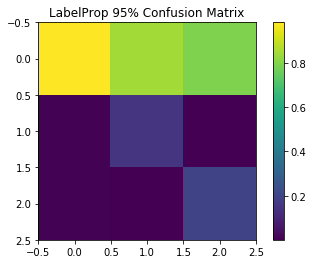

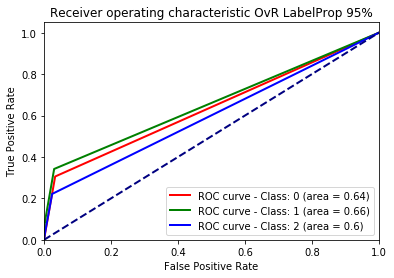

-----------------------------------------------------------------------


In [10]:
tables, labelProp_metrics_10 = trainer.train_model(model_name='LabelProp', unlabelled_ratio=0.1)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelProp - 10% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelProp 10%')
plot_roc(labelProp_metrics_10, data_classes_15, cls2clr, 'LabelProp 10%')

print('-----------------------------------------------------------------------')

tables, labelProp_metrics_20 = trainer.train_model(model_name='LabelProp', unlabelled_ratio=0.2)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelProp - 20% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelProp 20%')
plot_roc(labelProp_metrics_20, data_classes_15, cls2clr, 'LabelProp 20%')

print('-----------------------------------------------------------------------')

tables, labelProp_metrics_50 = trainer.train_model(model_name='LabelProp', unlabelled_ratio=0.5)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelProp - 50% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelProp 50%')
plot_roc(labelProp_metrics_50, data_classes_15, cls2clr, 'LabelProp 50%')

print('-----------------------------------------------------------------------')

tables, labelProp_metrics_90 = trainer.train_model(model_name='LabelProp', unlabelled_ratio=0.9)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelProp - 90% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelProp 90%')
plot_roc(labelProp_metrics_90, data_classes_15, cls2clr, 'LabelProp 90%')

print('-----------------------------------------------------------------------')

tables, labelProp_metrics_95 = trainer.train_model(model_name='LabelProp', unlabelled_ratio=0.95)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelProp - 95% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelProp 95%')
plot_roc(labelProp_metrics_95, data_classes_15, cls2clr, 'LabelProp 95%')

print('-----------------------------------------------------------------------')

----------------SSL LabelSpread - 10% Unlabelled----------------
+---------------+-----------------------+
|  LabelSpread  | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |        77.3916        |
|    Accuracy   |   0.8413706198172057  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.7818128468579972 | 0.858876255289395  | 0.8825906562785816 |
|     Recall     | 0.816787682594342  | 0.8326401107883571 | 0.8759422799799544 |
|  Specificity   | 0.8982838391340404 | 0.9171772371444147 | 0.9464734321984745 |
|    F1-score    | 0.798899392580183  | 0.8455090359390229 | 0.8792091730306584 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+

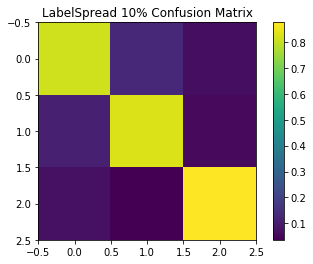

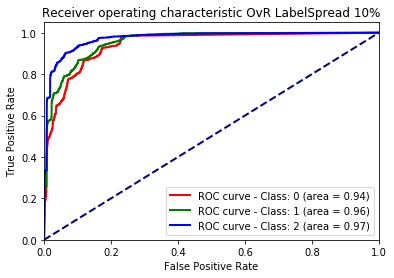

-----------------------------------------------------------------------
----------------SSL LabelSpread - 20% Unlabelled----------------
+---------------+-----------------------+
|  LabelSpread  | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |        77.6086        |
|    Accuracy   |   0.8381958901339568  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.7775120129566918 | 0.8564188194163336 | 0.8797170350091952 |
|     Recall     | 0.8124890738593902 | 0.8290158444014386 | 0.8744090058258145 |
|  Specificity   | 0.8962691836971002 | 0.9158443291804472 | 0.9450859271705628 |
|    F1-score    | 0.7946060564981428 | 0.8424555912425407 | 0.8770128774721538 |
+----------------+-------------------

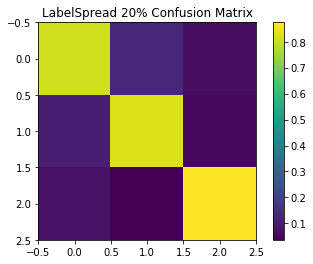

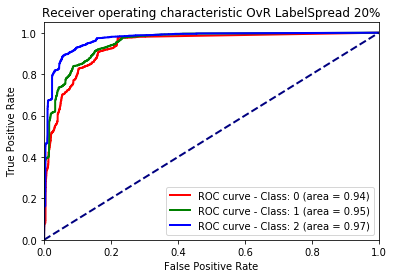

-----------------------------------------------------------------------


/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/

----------------SSL LabelSpread - 50% Unlabelled----------------
+---------------+-----------------------+
|  LabelSpread  | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   77.04209999999999   |
|    Accuracy   |   0.8230992618647714  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.7546941018346367 | 0.8439961004685198 | 0.8703817400999261 |
|     Recall     | 0.7958138498758655 | 0.8113915830641263 | 0.8638899767417068 |
|  Specificity   | 0.8845306960540844 | 0.9092003561496614 | 0.9409430960693663 |
|    F1-score    | 0.7746487846524788 | 0.8273011662146628 | 0.8670847191257547 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+

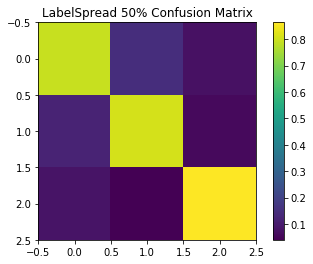

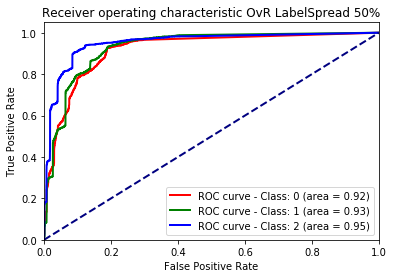

-----------------------------------------------------------------------


/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/

----------------SSL LabelSpread - 90% Unlabelled----------------
+---------------+-----------------------+
|  LabelSpread  | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |        77.7636        |
|    Accuracy   |   0.562678057024396   |
+---------------+-----------------------+
+----------------+--------------------+---------------------+---------------------+
| Metric / Class |         No         |         >30         |         <30         |
+----------------+--------------------+---------------------+---------------------+
|   Percision    | 0.4188087385354081 |  0.725800942674492  |  0.7658308403952053 |
|     Recall     | 0.7553847529362411 | 0.47400724113510095 | 0.47996635633851953 |
|  Specificity   | 0.5310139960345807 |  0.8919349095574193 |  0.9333605052479292 |
|    F1-score    | 0.538621007697354  |  0.5726343532308241 |  0.5884302669467312 |
+----------------+--------------------+---------------------+---------------------+
+-----+----

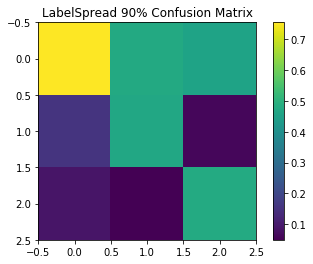

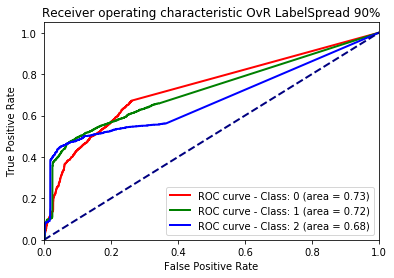

-----------------------------------------------------------------------


/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/

----------------SSL LabelSpread - 95% Unlabelled----------------
+---------------+-----------------------+
|  LabelSpread  | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |        77.5113        |
|    Accuracy   |  0.46147465204618604  |
+---------------+-----------------------+
+----------------+---------------------+--------------------+---------------------+
| Metric / Class |          No         |        >30         |         <30         |
+----------------+---------------------+--------------------+---------------------+
|   Percision    | 0.35344822341520815 | 0.6481473647452616 |  0.6971864426877253 |
|     Recall     |  0.7538650904101588 | 0.3494623810659971 |  0.3089740786430559 |
|  Specificity   |  0.3840463426207233 | 0.8863659280062153 |  0.9390477022892911 |
|    F1-score    |  0.4811607272509775 | 0.4534821757885988 | 0.42758117538938684 |
+----------------+---------------------+--------------------+---------------------+
+-----+----

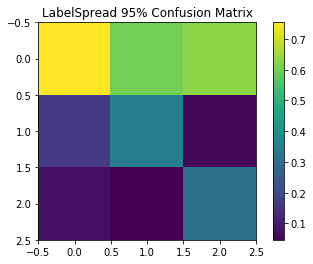

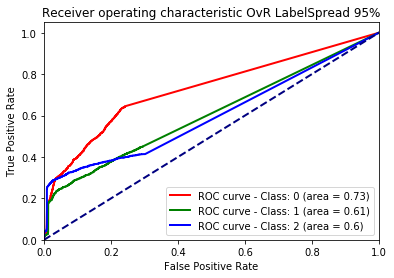

-----------------------------------------------------------------------


In [11]:
tables, labelSpread_metrics_10 = trainer.train_model(model_name='LabelSpread', unlabelled_ratio=0.1)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelSpread - 10% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelSpread 10%')
plot_roc(labelSpread_metrics_10, data_classes_15, cls2clr, 'LabelSpread 10%')

print('-----------------------------------------------------------------------')

tables, labelSpread_metrics_20 = trainer.train_model(model_name='LabelSpread', unlabelled_ratio=0.2)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelSpread - 20% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelSpread 20%')
plot_roc(labelSpread_metrics_20, data_classes_15, cls2clr, 'LabelSpread 20%')

print('-----------------------------------------------------------------------')

tables, labelSpread_metrics_50 = trainer.train_model(model_name='LabelSpread', unlabelled_ratio=0.5)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelSpread - 50% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelSpread 50%')
plot_roc(labelSpread_metrics_50, data_classes_15, cls2clr, 'LabelSpread 50%')

print('-----------------------------------------------------------------------')

tables, labelSpread_metrics_90 = trainer.train_model(model_name='LabelSpread', unlabelled_ratio=0.9)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelSpread - 90% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelSpread 90%')
plot_roc(labelSpread_metrics_90, data_classes_15, cls2clr, 'LabelSpread 90%')

print('-----------------------------------------------------------------------')

tables, labelSpread_metrics_95 = trainer.train_model(model_name='LabelSpread', unlabelled_ratio=0.95)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelSpread - 95% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelSpread 95%')
plot_roc(labelSpread_metrics_95, data_classes_15, cls2clr, 'LabelSpread 95%')

print('-----------------------------------------------------------------------')

----------------SSL SelfTrain - 10% Unlabelled----------------
+---------------+-----------------------+
|   SelfTrain   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   741.7092999999999   |
|    Accuracy   |   0.9438460956021395  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.9204821057446029 | 0.9451772916872188 | 0.9663421874613999 |
|     Recall     | 0.9522756363946396 | 0.9282237631936738 | 0.9543034913548336 |
|  Specificity   | 0.9632923193620628 | 0.9674042207929908 | 0.9847374256008463 |
|    F1-score    | 0.9360996166665361 | 0.9366102326028439 | 0.9602748251982153 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+--

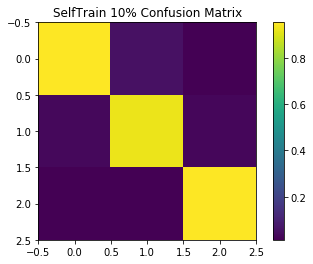

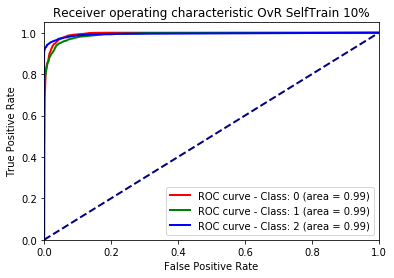

-----------------------------------------------------------------------
----------------SSL SelfTrain - 20% Unlabelled----------------
+---------------+-----------------------+
|   SelfTrain   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |        776.4821       |
|    Accuracy   |   0.937483322923711   |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.9121796463627169 | 0.9397731623371166 | 0.9608343199359636 |
|     Recall     | 0.9446324497227767 | 0.9217567831989507 | 0.9493206721770038 |
|  Specificity   | 0.9594182460767735 | 0.9642434991582475 | 0.9822360133562409 |
|    F1-score    | 0.9281151793499118 | 0.9306638465363367 | 0.9550330363127191 |
+----------------+--------------------+

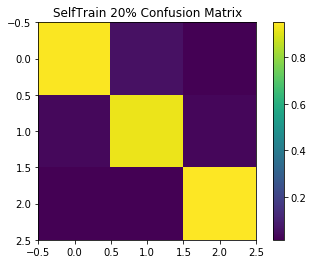

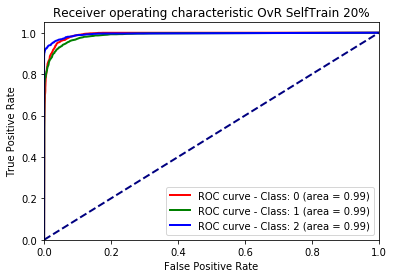

-----------------------------------------------------------------------
----------------SSL SelfTrain - 50% Unlabelled----------------
+---------------+-----------------------+
|   SelfTrain   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   805.4755000000001   |
|    Accuracy   |   0.907932790741112   |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.8661701052321039 | 0.9151670697674111 | 0.9437850659667235 |
|     Recall     | 0.9191852088821555 | 0.8832393980364607 | 0.926493821358612  |
|  Specificity   | 0.9366187810129043 | 0.9504396599009898 | 0.9746731981595496 |
|    F1-score    | 0.8918776223363215 | 0.8988990728183319 | 0.9350451417638708 |
+----------------+--------------------+

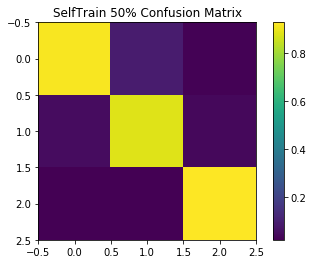

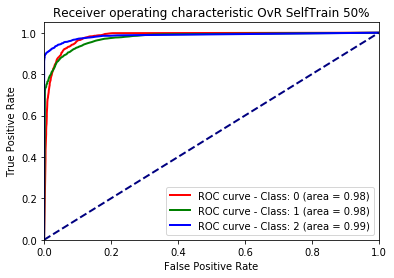

-----------------------------------------------------------------------
----------------SSL SelfTrain - 90% Unlabelled----------------
+---------------+-----------------------+
|   SelfTrain   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   827.3915000000001   |
|    Accuracy   |   0.7898917943527514  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.6513370421833246 | 0.853161280892605  | 0.9319085414141499 |
|     Recall     | 0.8806666256720261 | 0.7147419588179376 | 0.790937007519964  |
|  Specificity   | 0.7896129832700008 | 0.9254769714325333 | 0.9734615316177454 |
|    F1-score    | 0.7487819322447177 | 0.7777764361511574 | 0.855608568558537  |
+----------------+--------------------+

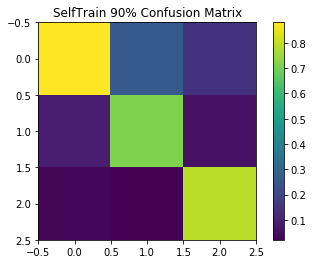

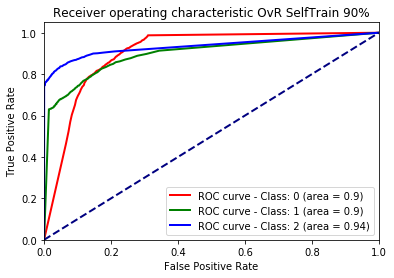

-----------------------------------------------------------------------


In [ ]:
tables, selftrain_metrics_10 = trainer.train_model(model_name='SelfTrain', unlabelled_ratio=0.1)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL SelfTrain - 10% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'SelfTrain 10%')
plot_roc(selftrain_metrics_10, data_classes_15, cls2clr, 'SelfTrain 10%')

print('-----------------------------------------------------------------------')

tables, selftrain_metrics_20 = trainer.train_model(model_name='SelfTrain', unlabelled_ratio=0.2)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL SelfTrain - 20% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'SelfTrain 20%')
plot_roc(selftrain_metrics_20, data_classes_15, cls2clr, 'SelfTrain 20%')

print('-----------------------------------------------------------------------')

tables, selftrain_metrics_50 = trainer.train_model(model_name='SelfTrain', unlabelled_ratio=0.5)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL SelfTrain - 50% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'SelfTrain 50%')
plot_roc(selftrain_metrics_50, data_classes_15, cls2clr, 'SelfTrain 50%')

print('-----------------------------------------------------------------------')

tables, selftrain_metrics_90 = trainer.train_model(model_name='SelfTrain', unlabelled_ratio=0.9)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL SelfTrain - 90% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'SelfTrain 90%')
plot_roc(selftrain_metrics_90, data_classes_15, cls2clr, 'SelfTrain 90%')

print('-----------------------------------------------------------------------')

tables, selftrain_metrics_95 = trainer.train_model(model_name='SelfTrain', unlabelled_ratio=0.95)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL SelfTrain - 95% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'SelfTrain 95%')
plot_roc(selftrain_metrics_95, data_classes_15, cls2clr, 'SelfTrain 95%')

print('-----------------------------------------------------------------------')